In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

# Recap: Matrix Multiplication

In [2]:
# A (a * b matrix)
# B (b * c matrix)
# A @ B (a * c matrix)
A = np.random.normal(size=(5, 7))
B = np.random.normal(size=(7, 100000))
C = np.random.normal(size=(100000, 32))
D = np.random.normal(size=(32, 56))
print(A.shape, B.shape, C.shape, D.shape)

(5, 7) (7, 100000) (100000, 32) (32, 56)


In [3]:
Y = A @ B @ C @ D
Y.shape

(5, 56)

# Decomposition/Factorization
Why is it useful to express something as a few parts multiplied together?

In [4]:
# at what points does y=0?
# y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)

<AxesSubplot:xlabel='x', ylabel='y'>

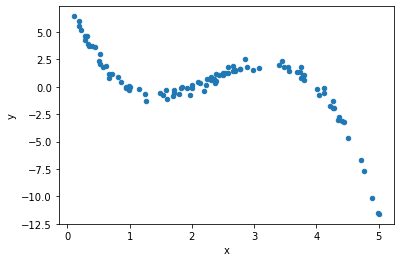

In [5]:
pd.DataFrame({"x": x, "y": y+noise}).plot.scatter(x="x", y="y")

# Decomposition with Principal Component Analysis (PCA)
#### sklearn.decomposition.PCA

In [6]:
df = pd.DataFrame(make_blobs(centers=2, random_state=320)[0], columns=["A", "B"])
df["C"] = df["A"] * 2
df["D"] = df["A"] - df["B"]
df.head()

,A,B,C,D
0,11.109262,-0.189146,22.218523,11.298408
1,9.821109,-2.902324,19.642217,12.723432
2,10.169915,-2.745896,20.339830,12.915812
3,8.511018,-3.654349,17.022037,12.165367
4,6.449035,-4.901184,12.898070,11.350219


# PCA on two columns

<AxesSubplot:xlabel='A', ylabel='B'>

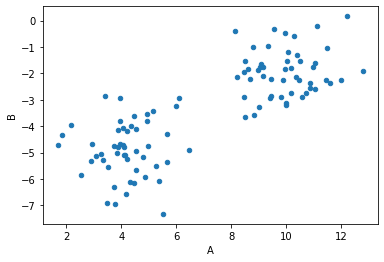

In [7]:
# plot A & B
df.plot.scatter("A", "B")

In [8]:
# sklearn.decomposition.PCA
p = PCA()
W = p.fit_transform(df[["A", "B"]])
C = p.components_

In [9]:
# PCA will first find the mean
mean_point = p.mean_
mean_point

array([ 7.06810262, -3.41780245])

In [10]:
df[["A", "B"]].mean()

A    7.068103
B   -3.417802
dtype: float64

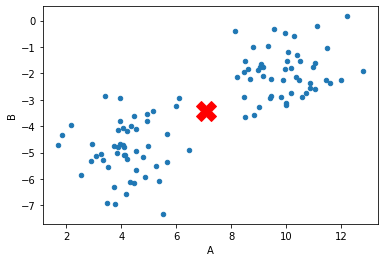

In [11]:
# plot mean point
df.plot.scatter("A", "B")
plt.plot(mean_point[0], mean_point[1], marker="X", markersize=20, color="red")

In [12]:
C # components 
# first row of C is the most important component
# second row of C is the second most important component
# and so on ...

array([[ 0.89372936,  0.44860655],
       [ 0.44860655, -0.89372936]])

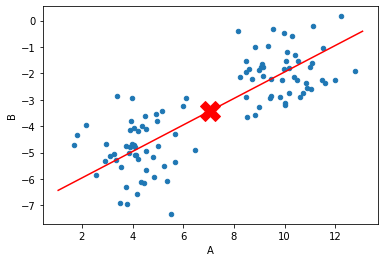

In [13]:
# plot first component 
df.plot.scatter("A", "B")

plt.plot(mean_point[0], mean_point[1], marker="X", markersize=20, color="red")
span = 6
point2 = [span + mean_point[0], C[0][1] / C[0][0] * span + mean_point[1]]
point3 = [-span + mean_point[0], C[0][1] / C[0][0] * (-span) + mean_point[1]]
x = [point2[0], point3[0]]
y = [point2[1], point3[1]]
plt.plot(x, y, linestyle="-", color="red")

In [14]:
W # first column of W represents relative positions of points along the first component
# second column of W represents relative positions of points along the second component
# and so on ...

# We can use W and C to reconstruct the original matrix
print(W.shape, C.shape)

(100, 2) (2, 2)


In [15]:
print(df[["A", "B"]].shape)

(100, 2)


In [16]:
pd.DataFrame((W @ C) + p.mean_).head()

,0,1
0,11.109262,-0.189146
1,9.821109,-2.902324
2,10.169915,-2.745896
3,8.511018,-3.654349
4,6.449035,-4.901184


In [17]:
df[["A", "B"]].head()

,A,B
0,11.109262,-0.189146
1,9.821109,-2.902324
2,10.169915,-2.745896
3,8.511018,-3.654349
4,6.449035,-4.901184


In [18]:
# reconstruct A & B using only the first component
pd.DataFrame(W[:, :1] @ C[:1, :] + p.mean_).head()

,0,1
0,11.590461,-1.147809
1,9.473744,-2.210293
2,9.815071,-2.038964
3,8.125795,-2.886895
4,5.978885,-3.964534


# Explained Variance

In [19]:
a = np.array([1.1, 1.9, 3.2])
a

array([1.1, 1.9, 3.2])

In [20]:
b = np.array([1, 2, 3])
b

array([1, 2, 3])

In [21]:
a - b

array([ 0.1, -0.1,  0.2])

In [22]:
a.var()

0.748888888888889

In [23]:
(a - b).var()

0.015555555555555585

In [24]:
1 - (a - b).var() / a.var()

0.9792284866468842

In [25]:
# how much each component @ weight is explaining the variance of the original matrix 
explained_variance = p.explained_variance_
explained_variance

array([11.75715225,  0.89773339])

In [26]:
explained_variance / explained_variance.sum()

array([0.92906033, 0.07093967])

In [27]:
p.explained_variance_ratio_

array([0.92906033, 0.07093967])

# PCA on dependent columns

In [28]:
p = PCA()
W = p.fit_transform(df[["A", "C"]])
C = p.components_

In [29]:
mean = p.mean_

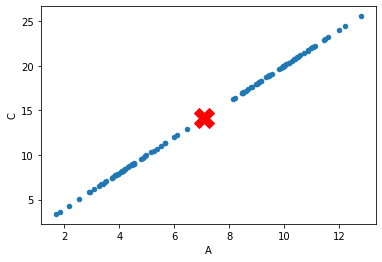

In [30]:
df.plot.scatter("A", "C")
mean_point = [mean[0],mean[1]]
plt.plot(mean[0],mean[1], marker="X", markersize=20, color="red")

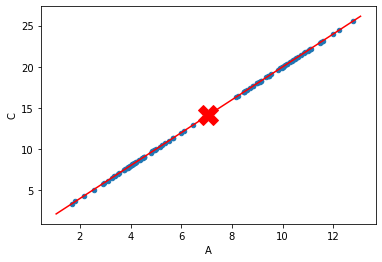

In [31]:
df.plot.scatter("A", "C")
mean_point = [mean[0],mean[1]]
plt.plot(mean_point[0], mean_point[1], marker="X", markersize=20, color="red")
span = 6
point2 = [span + mean_point[0], C[0][1] / C[0][0] * span + mean_point[1]]
point3 = [-span + mean_point[0], C[0][1] / C[0][0] * (-span) + mean_point[1]]
x = [point2[0], point3[0]]
y = [point2[1], point3[1]]
plt.plot(x, y, linestyle="-", color="red")

In [32]:
p.explained_variance_

array([4.78585887e+01, 3.96920544e-31])

In [33]:
p.explained_variance_ratio_

array([1.00000000e+00, 8.29361155e-33])

In [34]:
# we can construct A & C only using one component
pd.DataFrame(W[:, :1] @ C[:1, :] + p.mean_).head()

,0,1
0,11.109262,22.218523
1,9.821109,19.642217
2,10.169915,20.339830
3,8.511018,17.022037
4,6.449035,12.898070


In [35]:
df[["A", "C"]].head()

,A,C
0,11.109262,22.218523
1,9.821109,19.642217
2,10.169915,20.339830
3,8.511018,17.022037
4,6.449035,12.898070


# PCA on all columns

In [36]:
p = PCA()
W = p.fit_transform(df)
C = p.components_

In [37]:
p.explained_variance_

array([5.26851388e+01, 2.20370816e+00, 1.01353662e-30, 3.93198583e-31])

In [38]:
ev_ratio = p.explained_variance_ratio_
ev_ratio

array([9.59851440e-01, 4.01485599e-02, 1.84652562e-32, 7.16354241e-33])

In [39]:
pd.DataFrame(W[:, :2] @ C[:2, :] + p.mean_).head()

,0,1,2,3
0,11.109262,-0.189146,22.218523,11.298408
1,9.821109,-2.902324,19.642217,12.723432
2,10.169915,-2.745896,20.339830,12.915812
3,8.511018,-3.654349,17.022037,12.165367
4,6.449035,-4.901184,12.898070,11.350219


In [40]:
df.head()

,A,B,C,D
0,11.109262,-0.189146,22.218523,11.298408
1,9.821109,-2.902324,19.642217,12.723432
2,10.169915,-2.745896,20.339830,12.915812
3,8.511018,-3.654349,17.022037,12.165367
4,6.449035,-4.901184,12.898070,11.350219


Text(0.5, 0, 'Component')

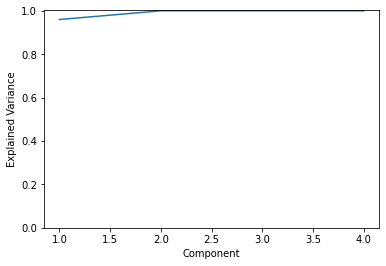

In [41]:
s = pd.Series(p.explained_variance_ratio_.cumsum(), index=range(1,5))
ax = s.plot.line(ylim=0)
ax.set_ylabel("Explained Variance")
ax.set_xlabel("Component")

# Feature Dimensionality Reduction

In [42]:
pipe = Pipeline([
    ("pca", PCA(2)), # specify an exact int, or a float indicates how much variance we want to explain
    ("km", KMeans(2)),
])

pipe.fit(df) # fit PCA, transform using PCA, fit KMeans using output from PCA

groups = pipe.predict(df) # transform using PCA

<AxesSubplot:xlabel='0', ylabel='1'>

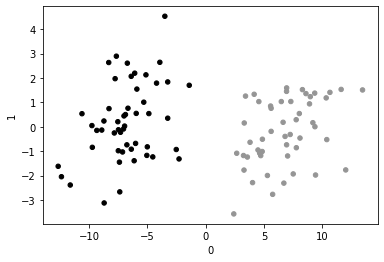

In [43]:
#-1 is white
pd.DataFrame(pipe["pca"].transform(df)).plot.scatter(x=0, y=1, c=groups, vmin=-1)

### Some other cool dimensionality reduction techniques:
https://pair-code.github.io/understanding-umap/ \
https://distill.pub/2016/misread-tsne/ 

# Lossy Compression

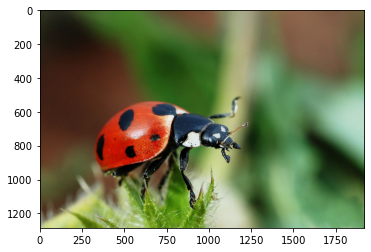

In [44]:
img = plt.imread("bug.jpg")
plt.imshow(img)

In [45]:
img.shape

(1286, 1920, 3)

In [46]:
img = img.mean(axis=2)
img.shape

(1286, 1920)

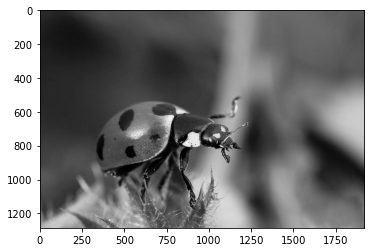

In [47]:
plt.imshow(img, cmap="gray")

In [48]:
p = PCA(0.95)
W = p.fit_transform(img)
C = p.components_
m = p.mean_

In [49]:
original_size = len(img.reshape(-1))
original_size

2469120

In [50]:
compressed_size = len(W.reshape(-1)) + len(C.reshape(-1)) + len(m.reshape(-1))
compressed_size

120542

In [51]:
# compression ratio
original_size / compressed_size

20.483482935408407

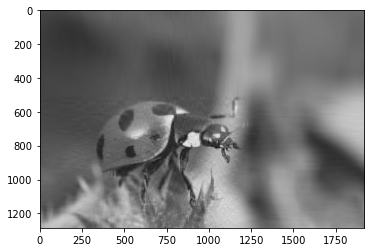

In [52]:
plt.imshow(W @ C + m, cmap="gray")

In [53]:
with open("img1.npz", "wb") as f: 
    np.savez(f, img)

In [54]:
with open("img2.npz", "wb") as f: 
    np.savez(f, W, C, m)

In [55]:
with np.load("img2.npz") as f: 
    W, C, m = f.values()

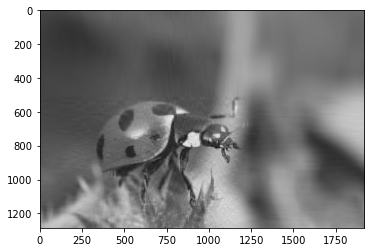

In [56]:
plt.imshow(W @ C + m, cmap="gray")

In [57]:
!ls -lh

total 42104
-rw-r--r--@ 1 yiyinshen  staff   284K Dec  8 23:14 bug.jpg
-rw-r--r--  1 yiyinshen  staff    19M Dec  9 11:36 img1.npz
-rw-r--r--  1 yiyinshen  staff   942K Dec  9 11:36 img2.npz
-rw-r--r--@ 1 yiyinshen  staff   478K Dec  9 11:35 template.ipynb
